# Навыки

* читать тексты из файла с помощью Python и разбивать их на слова
* переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
* решать системы линейных уравнений
* приближать любые функции с помощью многочленов


# Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные)
* UNIX-утилита cat для вывода содержимого файлов
* версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.



1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции `lower()`.
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: `re.split('[^a-z]', t)`. Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 254 * 22.
6. Найдите косинусное расстояние от первого предложения до всех остальных с помощью функции `scipy.spatial.distance.cosine`. Какие номера у двух предложений, ближайших к нулевому по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [38]:
with open('sentences.txt') as file:  
    sentences=file.readlines()  

In [39]:
sentences=list(map(lambda x: x.lower().strip(), sentences))

In [40]:
from re import split

sentences_tokens=list(map(lambda y: list(filter(lambda x: x!='', split('[^a-z]', y))), sentences))

In [41]:
words={}
index=0
for sentences_token in sentences_tokens:
    for token in sentences_token:
       if not(token in words):
           words[token]=index
           index+=1    

In [42]:
n=len(sentences)
m=len(words)

In [43]:
import numpy as np

matrix=np.zeros((n, m))
for i in range(n):
    tokens=sentences_tokens[i]
    for token in tokens:
        matrix[i][words[token]]+= 1  

In [44]:
from scipy.spatial import distance

cos_distance={} 
for i in range(1, n):
    cos_distance[i]=distance.cosine(matrix[0][:],matrix[i][:])

In [45]:
answer=sorted(cos_distance.items(), key=lambda item: item[1])
print(answer[:2])

[(6, 0.7327387580875756), (4, 0.7770887149698589)]


# Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

`f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)`

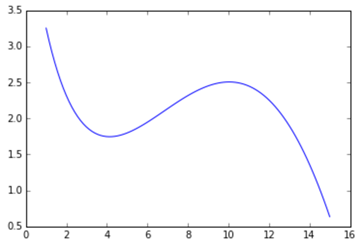

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть `w_0 + w_1 x + w_2 x^2 + ... + w_n x^n`) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

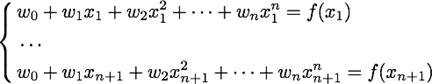

где через x_1, ..., x_n обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса.

In [1]:
import numpy as np

def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

In [2]:
def matrix_A(points):
    n=len(points)
    matrix=np.zeros((n, n))
    row=0
    for point in points:
        for m in range(n): 
            matrix[row][m]=point**m
        row+=1
    return matrix        

In [3]:
def approximation_func(w, points):
    n=len(w)
    y_circa=[]
    for point in points:
        y=0
        for m in range(n):
            y+=(point**m)*w[m]
        y_circa.append(y)
    return y_circa

In [4]:
x=np.arange(1, 15.1, 0.1)
y_1=list(map(f, x))

In [5]:
from scipy import linalg

In [6]:
x_2=[1,15]
y_2=list(map(f, x_2))
A_2=matrix_A(x_2)
w_2=linalg.solve(A_2, y_2)
y_circa_2=approximation_func(w_2, x)

In [7]:
x_3=[1, 8, 15]
y_3=list(map(f, x_3))
A_3=matrix_A(x_3)
w_3=linalg.solve(A_3, y_3)
y_circa_3=approximation_func(w_3, x)

In [8]:
x_4=[1, 4, 8, 15]
y_4=list(map(f, x_4))
A_4=matrix_A(x_4)
w_4=linalg.solve(A_4, y_4)
y_circa_4=approximation_func(w_4, x)

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


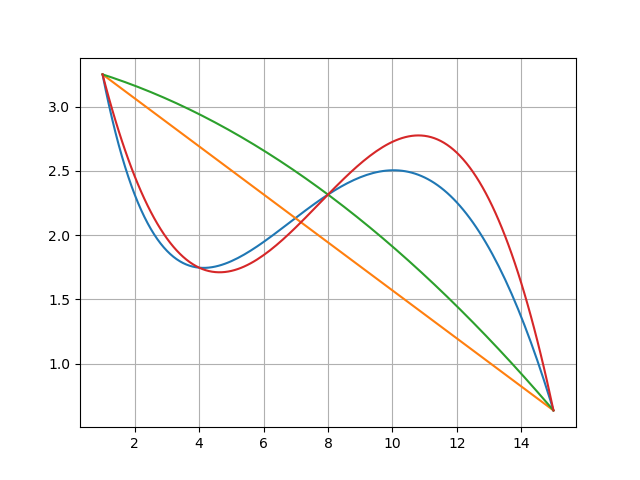

In [28]:
plt.figure('Approximation function')
plt.plot(x, y_1) #blue
plt.plot(x, y_circa_2) #orange
plt.plot(x, y_circa_3) #green
plt.plot(x, y_circa_4) #red
plt.grid(True)
plt.show()

In [37]:
print(list(map(lambda x: round(x, 2) , w_4)))


[4.41, -1.36, 0.21, -0.01]
